<a href="https://colab.research.google.com/github/SnehaPrasanna1/ML-LAB-/blob/main/1BM22CS284_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal k value for IRIS dataset: 1

Accuracy Score (IRIS Dataset): 1.0

Confusion Matrix (IRIS Dataset):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (IRIS Dataset):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



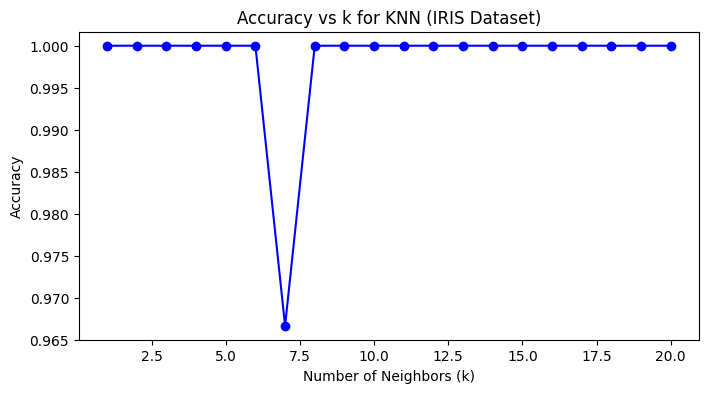


Optimal k value for DIABETES dataset: 18

Accuracy Score (Diabetes Dataset): 0.7597402597402597

Confusion Matrix (Diabetes Dataset):
 [[88 11]
 [26 29]]

Classification Report (Diabetes Dataset):
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



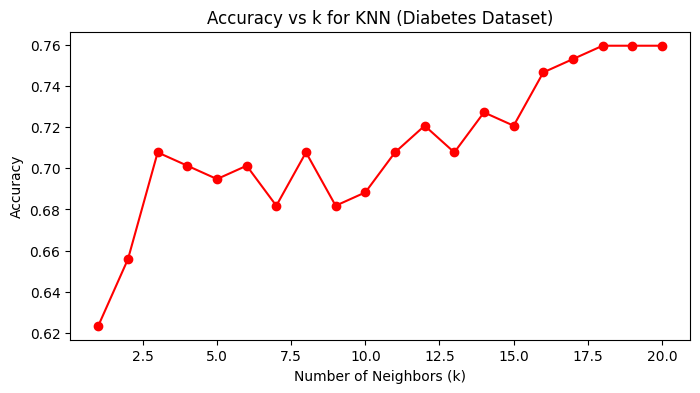

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Task 1: KNN Classifier for the IRIS Dataset ###

# Load the Iris dataset from Excel using pd.read_excel
iris_df = pd.read_excel("/content/iris.xlsx") # Changed to pd.read_excel to correctly read .xlsx files

# Splitting features (X) and target (y)
X_iris = iris_df.iloc[:, :-1].values  # Features
y_iris = iris_df.iloc[:, -1].values   # Target

# Split the dataset (80% training, 20% testing)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Choosing the best k value
k_values = range(1, 21)
accuracy_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    y_pred = knn.predict(X_test_iris)
    accuracy_rates.append(accuracy_score(y_test_iris, y_pred))

# Best k value based on highest accuracy
best_k = k_values[np.argmax(accuracy_rates)]
print(f"Optimal k value for IRIS dataset: {best_k}")

# Train final model with best k
knn_iris = KNeighborsClassifier(n_neighbors=best_k)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

# Display evaluation metrics
print("\nAccuracy Score (IRIS Dataset):", accuracy_score(y_test_iris, y_pred_iris))
print("\nConfusion Matrix (IRIS Dataset):\n", confusion_matrix(y_test_iris, y_pred_iris))
print("\nClassification Report (IRIS Dataset):\n", classification_report(y_test_iris, y_pred_iris))

# Plot accuracy vs k
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracy_rates, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for KNN (IRIS Dataset)")
plt.show()


### Task 2: KNN Classifier for the Diabetes Dataset with Feature Scaling ###

# Load the Diabetes dataset from CSV
diabetes_df = pd.read_csv("/content/diabetes.csv")

# Splitting features (X) and target (y)
X_diabetes = diabetes_df.iloc[:, :-1].values  # Features
y_diabetes = diabetes_df.iloc[:, -1].values   # Target

# Split the dataset (80% training, 20% testing)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# Choosing the best k value
k_values = range(1, 21)
accuracy_rates_diabetes = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_diabetes, y_train_diabetes)
    y_pred = knn.predict(X_test_diabetes)
    accuracy_rates_diabetes.append(accuracy_score(y_test_diabetes, y_pred))

# Best k value based on highest accuracy
best_k_diabetes = k_values[np.argmax(accuracy_rates_diabetes)]
print(f"\nOptimal k value for DIABETES dataset: {best_k_diabetes}")

# Train final model with best k
knn_diabetes = KNeighborsClassifier(n_neighbors=best_k_diabetes)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

# Display evaluation metrics
print("\nAccuracy Score (Diabetes Dataset):", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("\nConfusion Matrix (Diabetes Dataset):\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))
print("\nClassification Report (Diabetes Dataset):\n", classification_report(y_test_diabetes, y_pred_diabetes))

# Plot accuracy vs k
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracy_rates_diabetes, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for KNN (Diabetes Dataset)")
plt.show()